# 次元削減: PCAとt-SNE

update: 2019/02/05

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE


%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-colorblind')

データを準備する。有名なアヤメデータセットを使うが、seasbornをimportしておけば簡単にデータセットをロードできる。csvファイルも世の中に存在しているので、それをDLしてきてpandasで読み込んで使ってもよい。iris.csvファイルを読み込む場合はpd.read_csvを使って読み込めばよい。scikit-learnのload_irisをimportしてもよい。

ここでは、seaornについてくるデータセットを使っている。

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


データを目的変数と説明変数に分離

In [5]:
target = iris["species"]
features = iris.drop("species", axis=1)

## PCA（主成分分析）

主成分の数は2とする。

In [6]:
pca = PCA(n_components=2)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

分析結果を元にデータセットを主成分に変換する

In [8]:
X_reduced = pca.fit_transform(features)

主成分をプロットする。

Text(0,0.5,'component 2')

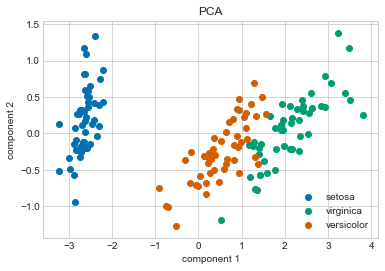

In [37]:
fig, ax = plt.subplots()
names = set(iris['species'])
for name in names:
    cond = iris['species'] == name
    ax.scatter(X_reduced[target == name, 0],
                X_reduced[target == name, 1],
                label = name
               )
ax.legend()
ax.set_title('PCA')
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')

それなりに分離出来ているのかもしれない。

第1主成分、第2主成分の寄与率を計算する。

In [38]:
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

各次元の寄与率: [0.92461872 0.05306648]
累積寄与率: 0.9776852063187949


寄与率から見てもグラフを見てもほとんど第1主成分で説明出来ているということがわかる。

## t-SNE

In [40]:
X_reduced2 = TSNE(n_components=2, random_state=0).fit_transform(features)

In [42]:
print(X_reduced2.shape)

(150, 2)


Text(0,0.5,'component 2')

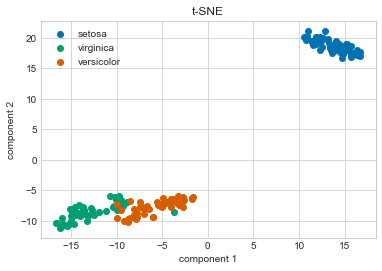

In [44]:
fig, ax = plt.subplots()
names = set(iris['species'])
for name in names:
    cond = iris['species'] == name
    ax.scatter(X_reduced2[target == name, 0],
                X_reduced2[target == name, 1],
                label = name
               )
ax.legend()
ax.set_title('t-SNE')
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')

先のPCAの結果よりも若干うまく分離出来ているような気もするが、やはりverginicaとversicolorがいくらか混ざっているっぽい。

# Reference

https://blog.amedama.jp/entry/2017/04/02/130530

http://inaz2.hatenablog.com/entry/2017/01/24/211331